In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from tqdm import tqdm_notebook as tqdm

import seaborn as sns

import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import kstest_normal

# Задача 5

In [2]:
def cut_normal(m):
    List = []
    while len(List) < m:
        r = np.random.randn(1)
        if np.abs(r) < 2:
            List.append(r)
            
    return np.array(List)

In [3]:
def experiment(method = kstest_normal, m = 500, k_for_averaging = 100):

    List_for_normal = []
    List_for_student = []
    List_for_laplas = []
    List_for_cut_normal = []
    for _ in range(k_for_averaging):
        data = np.random.randn(m)
        List_for_normal.append(method(data)[1] < 0.05)

        data = np.random.standard_t(5, size = m)
        List_for_student.append(method(data)[1] < 0.05)

        data = np.random.laplace(size = m)
        List_for_laplas.append(method(data)[1] < 0.05)

        data = cut_normal(m)
        List_for_cut_normal.append(method(data)[1] < 0.05)
   
    return np.mean(List_for_normal), np.mean(List_for_student), np.mean(List_for_laplas), np.mean(List_for_cut_normal)


### Решение

In [4]:
M = np.arange(10, 900, 10)
k_for_averaging = 100

List_of_distribution_name = ['normal', 'student', 'laplace', 'cut_normal']

#### Лиллиефорса

In [5]:
Lillieforce = dict()
Lillieforce['normal'] = []
Lillieforce['student'] = []
Lillieforce['laplace'] = []
Lillieforce['cut_normal'] = []
for m in tqdm(M):
    nor, stud, lapl, cut = experiment(kstest_normal, m, k_for_averaging)
    Lillieforce['normal'].append(nor)
    Lillieforce['student'].append(stud)
    Lillieforce['laplace'].append(lapl)
    Lillieforce['cut_normal'].append(cut)

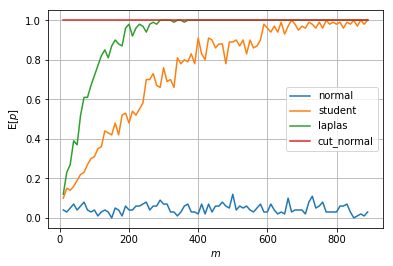

In [6]:
for key in Lillieforce.keys():
    plt.plot(M, Lillieforce[key], label = key)
    
plt.grid()
plt.xlabel('$m$')
plt.ylabel('$\mathsf{E}[p] $')
plt.legend(loc = 'best')
plt.show()

#### Харке-Бера

In [7]:
Jarque = dict()
Jarque['normal'] = []
Jarque['student'] = []
Jarque['laplace'] = []
Jarque['cut_normal'] = []
for m in tqdm(M):
    nor, stud, lapl, cut = experiment(st.jarque_bera, m, k_for_averaging)
    Jarque['normal'].append(nor)
    Jarque['student'].append(stud)
    Jarque['laplace'].append(lapl)
    Jarque['cut_normal'].append(cut)

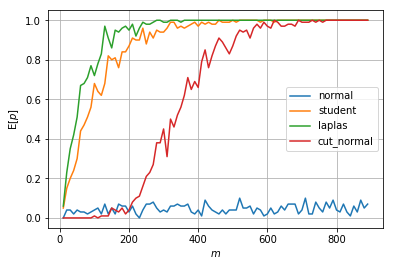

In [8]:
for key in Jarque.keys():
    plt.plot(M, Jarque[key], label = key)
    
plt.grid()
plt.xlabel('$m$')
plt.ylabel('$\mathsf{E}[p] $')
plt.legend(loc = 'best')
plt.show()

#### Шапиро-Улика

In [9]:
Shapiro = dict()
Shapiro['normal'] = []
Shapiro['student'] = []
Shapiro['laplace'] = []
Shapiro['cut_normal'] = []
for m in tqdm(M):
    nor, stud, lapl, cut = experiment(st.shapiro, m, k_for_averaging)
    Shapiro['normal'].append(nor)
    Shapiro['student'].append(stud)
    Shapiro['laplace'].append(lapl)
    Shapiro['cut_normal'].append(cut)

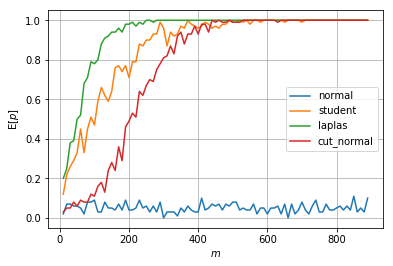

In [10]:
for key in Shapiro.keys():
    plt.plot(M, Shapiro[key], label = key)
    
plt.grid()
plt.xlabel('$m$')
plt.ylabel('$\mathsf{E}[p] $')
plt.legend(loc = 'best')
plt.show()

#### Общие графики

In [11]:
Experiment = dict()
Experiment['Lillieforce'] = Lillieforce
Experiment['Jarque'] = Jarque
Experiment['Shapiro'] = Shapiro

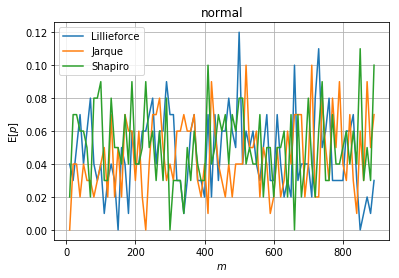

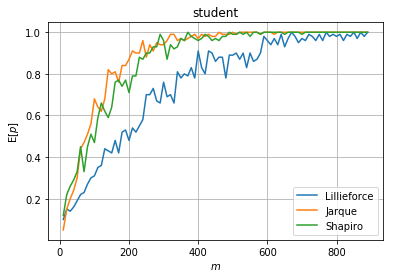

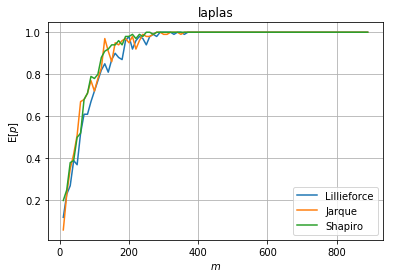

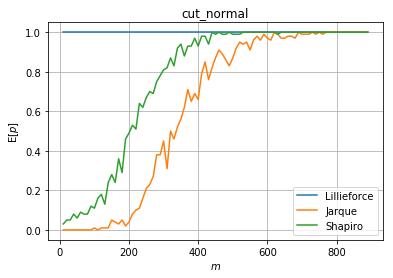

In [13]:
for name in List_of_distribution_name:
    for key in Experiment.keys():
        plt.plot(M, Experiment[key][name], label = key)
        
    plt.title(name)
    plt.legend(loc = 'best')
    plt.grid()
    plt.xlabel('$m$')
    plt.ylabel('$\mathsf{E}[p] $')
    plt.show()

### Вывод

Как видно из графиков выше, при большом объеме выборки $m > 800$ все методы ведут себя одинаково. При малом же количестве данных, все методы ведут себя по разному для разных распределений.

* Normal distribution --- все методы ведут себя одинакового $\rightarrow$ все они одинаково консервативны.
* Student distribution --- лучше всего себя показывает критерий Jarque-Bera в то время, как худже всего является тест Lillieforce.
* Laplace dictribution --- все методы ведут себя эквивалентно.
* Cut normal distribution --- лучше всего себя ведет Lillieforce, в то время как худже всего себя ведет Jarque-Bera.

Как видно, оптимальнее всего является использовать тест Shapiro, так-как его мощность на всех выборках является допустимой.